In [1]:
import numpy as np

import pandas as pd
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


# Importing the dataset

In [4]:
data = pd.read_csv('bestsellers with categories.csv',sep=',',encoding='latin')
data.head(5)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


# 1- Data preparation

In [ ]:
#For each year
data.groupby('Name')['User Rating'].mean().sort_values(ascending=True).head()

Name
The Casual Vacancy                                                                          3.3
Go Set a Watchman: A Novel                                                                  3.6
Fifty Shades of Grey: Book One of the Fifty Shades Trilogy (Fifty Shades of Grey Series)    3.8
The Goldfinch: A Novel (Pulitzer Prize for Fiction)                                         3.9
Allegiant                                                                                   3.9
Name: User Rating, dtype: float64

In [ ]:
data.groupby('Name')['User Rating'].count().sort_values(ascending=False).head()

Name
Publication Manual of the American Psychological Association, 6th Edition       10
StrengthsFinder 2.0                                                              9
Oh, the Places You'll Go!                                                        8
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change     7
The Very Hungry Caterpillar                                                      7
Name: User Rating, dtype: int64

In [ ]:
data.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [ ]:
#550 rows /7 columns
data.shape

(550, 7)

In [ ]:
#Check if we have any Null Values
data.isnull().any()

Name           False
Author         False
User Rating    False
Reviews        False
Price          False
Year           False
Genre          False
dtype: bool

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


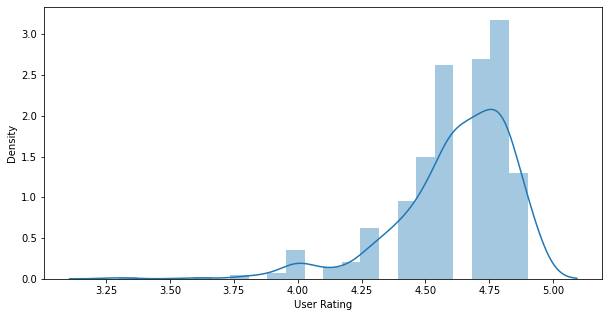

In [ ]:
plt.figure(figsize=(10,5))
plt.tight_layout()
seabornInstance.distplot(data['User Rating'])

# 2- Rating counts / Reviews

> Rating counts under 2 representes the majority of books



In [ ]:
#Construction of my rating counts dataframe
data_to_p = pd.DataFrame(data.groupby('Name')['User Rating'].mean())

In [ ]:
data_to_p['rating_counts'] = pd.DataFrame(data.groupby('Name')['User Rating'].count())

In [ ]:
data_to_p.groupby('Name')['rating_counts'].max().sort_values(ascending=False).head()

Name
Publication Manual of the American Psychological Association, 6th Edition       10
StrengthsFinder 2.0                                                              9
Oh, the Places You'll Go!                                                        8
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change     7
The Very Hungry Caterpillar                                                      7
Name: rating_counts, dtype: int64

In [ ]:
data_to_p['Reviews'] = pd.DataFrame(data.groupby('Name')['Reviews'].sum())

In [ ]:
data_to_p['Price'] = pd.DataFrame(data.groupby('Name')['Price'].mean())

In [ ]:
data_to_p

,User Rating,rating_counts,Reviews,Price
Name,,,,
10-Day Green Smoothie Cleanse,4.7,1,17350,8.0
11/22/63: A Novel,4.6,1,2052,22.0
12 Rules for Life: An Antidote to Chaos,4.7,1,18979,15.0
1984 (Signet Classics),4.7,1,21424,6.0
"5,000 Awesome Facts (About Everything!) (National Geographic Kids)",4.8,1,7665,12.0
...,...,...,...,...
Winter of the World: Book Two of the Century Trilogy,4.5,1,10760,15.0
Women Food and God: An Unexpected Path to Almost Everything,4.2,1,1302,11.0
Wonder,4.8,5,108125,9.0


In [ ]:
data_to_p.reset_index(inplace=True)

In [ ]:
data_to_p.head()

,Name,User Rating,rating_counts,Reviews,Price
0,10-Day Green Smoothie Cleanse,4.7,1,17350,8.0
1,11/22/63: A Novel,4.6,1,2052,22.0
2,12 Rules for Life: An Antidote to Chaos,4.7,1,18979,15.0
3,1984 (Signet Classics),4.7,1,21424,6.0
4,"5,000 Awesome Facts (About Everything!) (Natio...",4.8,1,7665,12.0


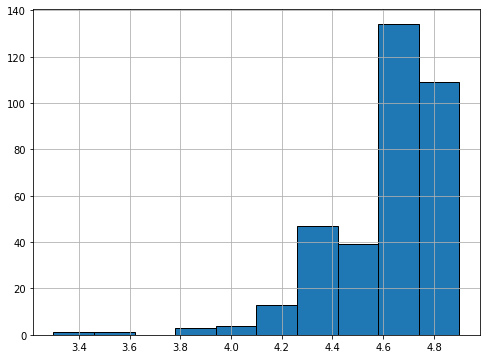

In [ ]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
#Highest rate = 4.9/5
data_to_p['User Rating'].hist(bins=10)

In [ ]:
data_to_p.groupby('Name')['Reviews'].max().sort_values(ascending=False).head()

Name
The Fault in Our Stars                                                    201928
Oh, the Places You'll Go!                                                 174672
Gone Girl                                                                 171813
The Girl on the Train                                                     158892
Unbroken: A World War II Story of Survival, Resilience, and Redemption    148365
Name: Reviews, dtype: int64

<Figure size 576x432 with 0 Axes>

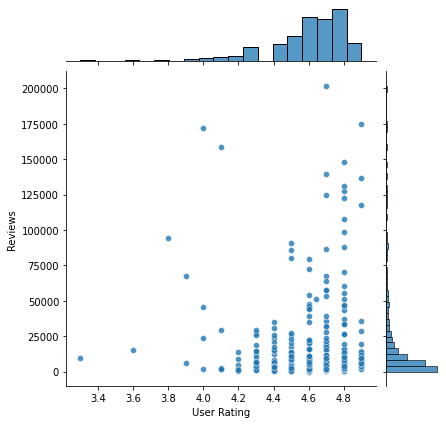

In [ ]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
seabornInstance.jointplot(x='User Rating', y='Reviews', data=data_to_p, alpha=0.8)

<Figure size 576x432 with 0 Axes>

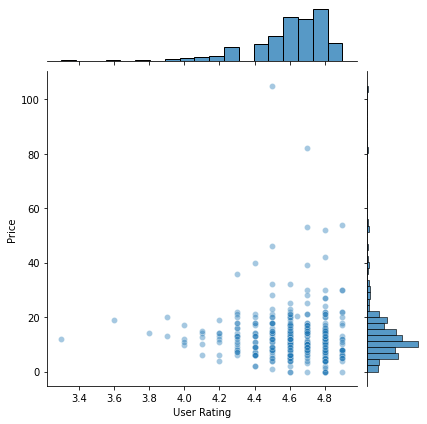

In [ ]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
seabornInstance.jointplot(x='User Rating', y='Price', data=data_to_p, alpha=0.4)

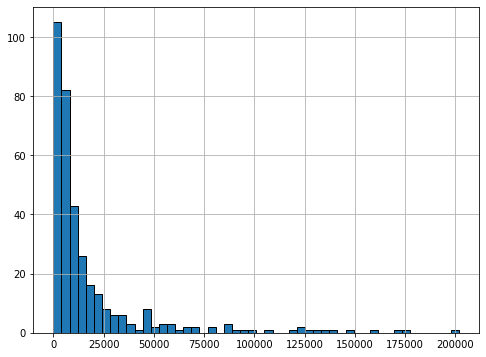

In [ ]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
data_to_p['Reviews'].hist(bins=50)

#From the output, you can see that most of the books have received less than 50000 Reviews. While the number of books having more than 200000 ratings is very low.

# Linear Regression


In [51]:
X = data.iloc[:,[0,1,3,4,5,6]]
Y = data['User Rating']
print(X)
print(Y)

     Name  Author  Reviews  Price  Year  Genre
0       0       0  17350.0    8.0     0      0
1       1       1   2052.0   22.0     1      1
2       2       2  18979.0   15.0     2      0
3       3       3  21424.0    6.0     3      1
4       4       4   7665.0   12.0     4      0
..    ...     ...      ...    ...   ...    ...
545   349      33   9413.0    8.0     4      1
546   350     247  14331.0    8.0     0      0
547   350     247  14331.0    8.0     3      0
548   350     247  14331.0    8.0     2      0
549   350     247  14331.0    8.0     4      0

[550 rows x 6 columns]
0      4.7
1      4.6
2      4.7
3      4.7
4      4.8
      ... 
545    4.9
546    4.7
547    4.7
548    4.7
549    4.7
Name: User Rating, Length: 550, dtype: float64


In [7]:
#Factorized columns
data['Year'] = pd.factorize(data['Year'])[0]
data['Name']= pd.factorize(data['Name'])[0]
data['Author'] = pd.factorize(data['Author'])[0]
data['Genre'] = pd.factorize(data['Genre'])[0]

In [8]:
data

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,0,0,4.7,17350,8,0,0
1,1,1,4.6,2052,22,1,1
2,2,2,4.7,18979,15,2,0
3,3,3,4.7,21424,6,3,1
4,4,4,4.8,7665,12,4,0
...,...,...,...,...,...,...,...
545,349,33,4.9,9413,8,4,1
546,350,247,4.7,14331,8,0,0
547,350,247,4.7,14331,8,3,0
548,350,247,4.7,14331,8,2,0


In [10]:
data['Price'] = data['Price'].astype(float)
data['Reviews']= data['Reviews'].astype(float)

In [11]:
data.dtypes

Name             int64
Author           int64
User Rating    float64
Reviews        float64
Price          float64
Year             int64
Genre            int64
dtype: object

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [53]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
y_pred = regressor.predict(X_test)


In [55]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Name,0.000056
Author,-0.000019
Reviews,-0.000001
Price,-0.002207
Year,-0.009078
Genre,0.046131


In [56]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df
df1

,Actual,Predicted
85,4.9,4.657708
441,4.4,4.507091
96,4.7,4.616579
172,4.8,4.562467
134,4.6,4.601358
...,...,...
424,4.5,4.639610
233,4.6,4.609541
516,4.8,4.615042
412,4.7,4.594014


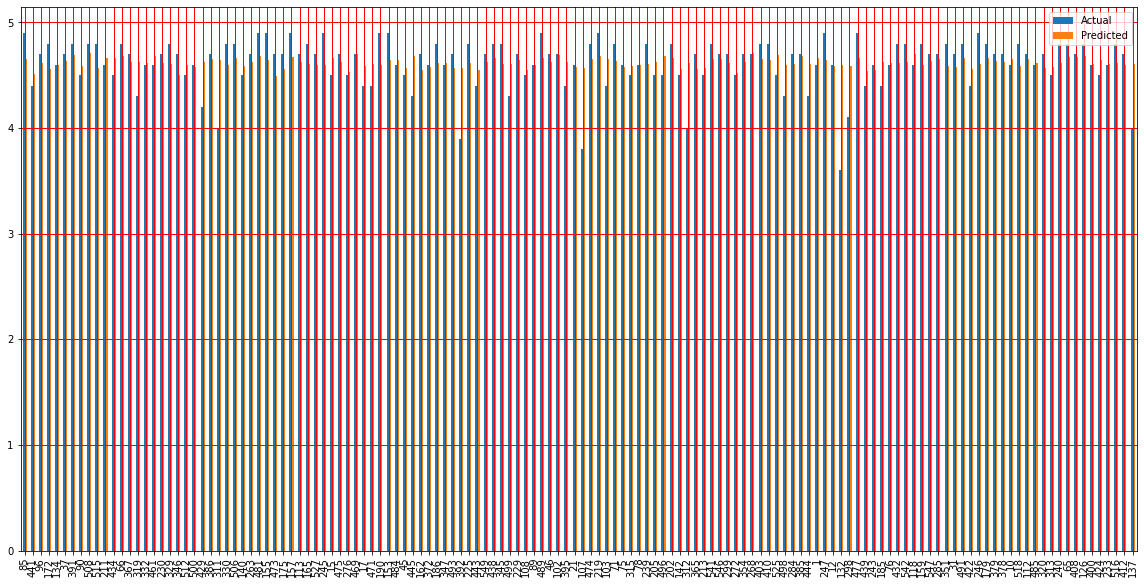

In [57]:
df1.plot(kind='bar',figsize=(20,10))
plt.grid(which='major', linestyle='-', linewidth='1', color='red')
plt.grid(which='minor', linestyle=':', linewidth='1', color='black')
plt.show()

In [58]:
print('Mean Absolute Error MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print()

Mean Absolute Error MAE: 0.1588700632748745
Mean Squared Error MSE: 0.04862634817876272
Root Mean Squared Error RMSE: 0.22051382763618865





``````

Predicting Response


Text(0.5, 1.0, 'pearson correlation')

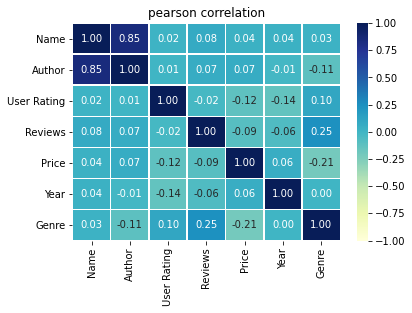

In [ ]:
corr_matrix = X_train.corr(method="pearson")
seabornInstance.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("pearson correlation")



```
# Ce texte est au format code
```

# ADD -CART


In [ ]:
X1 = data.iloc[:,[0,1,3,4,5,6]].values
Y2 = pd.factorize(data['User Rating'])[0]

Y2

array([ 0,  1,  0,  0,  2,  3,  0,  0,  0,  1,  1,  1,  1,  4,  1,  4,  1,
        3,  4,  2,  1,  1,  5,  1,  6,  1,  0,  7,  1,  1,  2,  0,  2,  2,
        2,  0,  0,  0,  1,  4,  8,  8,  2,  1,  2,  4,  0,  0,  0,  0,  0,
        0,  0,  6,  2,  2,  1,  1,  2,  3,  1,  6,  7,  2,  2,  2,  2,  1,
        1,  4,  4,  2,  2,  2,  1,  1,  1,  4,  1,  0,  2,  8,  8,  8,  8,
        8,  8,  8,  2,  1,  4,  4,  6,  4,  4,  0,  0,  0,  0,  0,  1,  1,
        0,  3,  3,  4,  9,  9,  4,  7,  0,  0,  0,  0,  0,  3,  0,  3,  1,
        1,  1,  4,  1,  2,  2,  2,  2,  2,  1,  1,  1,  1, 10,  2,  1, 11,
       11, 11,  1,  4,  4,  4,  4,  2,  2,  2,  8,  8,  1,  3,  2,  8,  2,
        8, 11,  8,  8,  8,  0,  2,  2,  0,  0,  3,  3,  2,  0,  0,  0,  0,
        0,  6,  2,  2,  8,  0,  2,  1,  2,  2,  6,  3, 12,  1,  3,  3,  2,
        8,  8,  8,  8,  8,  8,  1,  4,  1,  4,  1,  0,  0,  1,  1,  2,  2,
        4,  4,  4,  8,  1,  1,  1,  1,  1,  4,  4,  3,  2,  4, 12,  8,  4,
        4,  7,  2,  2,  2

In [ ]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y2,test_size=0.2, random_state=0)

Centrage Reduction of  data with MinMaxScaler(): applying the fonction (xi-xmin)/(xmax-xmin)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train1 = scaler.fit_transform(X_train1)
X_test1 = scaler.fit_transform(X_test1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc_model = DecisionTreeClassifier().fit(X_train1, y_train1)
y_pred_dtc = dtc_model.predict(X_test1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(X_train1 ,y_train1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
print('Accuracy of CART classifier on training set: {:.2f}'
     .format(knn.score(X_train1, y_train1)))
print('Accuracy of CART classifier on test set: {:.2f}'
     .format(knn.score(X_test1, y_test1)))

Accuracy of CART classifier on training set: 0.52
Accuracy of CART classifier on test set: 0.30


In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydot
dot_data = StringIO()
export_graphviz(dtc_model, out_file=dot_data)
graph=pydot.graph_from_dot_data(dot_data.getvalue())
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_png("tree.png")

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test1, y_pred_dtc))

[[ 5  7  5  0  1  0  1  0  3  1  0  0  3]
 [ 1  7  4  0  3  0  0  0  1  0  0  0  0]
 [ 3  3 12  0  1  0  2  0  1  0  0  0  0]
 [ 2  1  1  0  1  0  0  0  3  0  0  0  0]
 [ 3  1  4  3  2  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  1  0  1  0  0  2  0  1  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 3  2  4  0  0  0  1  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.29      0.19      0.23        26
           1       0.29      0.44      0.35        16
           2       0.38      0.55      0.44        22
           3       0.00      0.00      0.00         8
           4       0.25      0.13      0.17        15
           5       0.00      0.00      0.00         1
           6       0.25      0.40      0.31         5
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00        11
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         1

    accuracy                           0.25       110
   macro avg       0.11      0.13      0.12       110
weighted avg       0.23      0.25      0.23       110



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
